## 파일 불러오기 및 확인, 전처리

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [10]:
print(os.listdir('./Kaggle_Struggle_data/Market predict'))

['products.csv', 'orders.csv', 'order_products__train.csv', 'departments.csv', 'aisles.csv', 'order_products__prior.csv', 'sample_submission.csv']


In [9]:
orders = pd.read_csv('./Kaggle_Struggle_data/Market predict/orders.csv')

In [7]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [18]:
orders.shape

(3421083, 7)

In [13]:
prior = pd.read_csv('./Kaggle_Struggle_data/Market predict/order_products__prior.csv')

In [14]:
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [19]:
prior.shape

(32434489, 4)

In [15]:
train = pd.read_csv('./Kaggle_Struggle_data/Market predict/order_products__train.csv')

In [16]:
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [20]:
train.shape

(1384617, 4)

In [22]:
prior = prior[0:300000]

In [23]:
order_prior = pd.merge(prior, orders, on = ['order_id','order_id'])
order_prior = order_prior.sort_values(by = ['user_id', 'order_id'])
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
221645,23391,13198,1,1,7,prior,17,0,10,28.0
221646,23391,42803,2,1,7,prior,17,0,10,28.0
221647,23391,8277,3,1,7,prior,17,0,10,28.0
221648,23391,37602,4,1,7,prior,17,0,10,28.0
221649,23391,40852,5,1,7,prior,17,0,10,28.0


In [26]:
products = pd.read_csv('./Kaggle_Struggle_data/Market predict/products.csv')

In [27]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [28]:
aisles = pd.read_csv('./Kaggle_Struggle_data/Market predict/aisles.csv')

In [29]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [30]:
_mt = pd.merge(prior, products, on = ['product_id', 'product_id'])
_mt = pd.merge(_mt, orders, on = ['order_id','order_id'])
mt = pd.merge(_mt, aisles, on = ['aisle_id','aisle_id'])
mt.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs
5,537,33120,2,1,Organic Egg Whites,86,16,180135,prior,15,2,8,3.0,eggs
6,582,33120,7,1,Organic Egg Whites,86,16,193223,prior,6,2,19,10.0,eggs
7,608,33120,5,1,Organic Egg Whites,86,16,91030,prior,11,3,21,12.0,eggs
8,623,33120,1,1,Organic Egg Whites,86,16,37804,prior,63,3,12,3.0,eggs
9,689,33120,4,1,Organic Egg Whites,86,16,108932,prior,16,1,13,3.0,eggs


In [34]:
mt['product_name'].value_counts()[0:10]

Banana                    4432
Bag of Organic Bananas    3563
Organic Strawberries      2370
Organic Baby Spinach      2242
Organic Hass Avocado      1985
Organic Avocado           1626
Large Lemon               1380
Strawberries              1343
Organic Raspberries       1293
Limes                     1270
Name: product_name, dtype: int64

In [35]:
len(mt['product_name'].unique())

24836

In [37]:
prior.shape

(300000, 4)

## 고객 군집화

In [38]:
len(mt['aisle'].unique())

134

In [40]:
mt['aisle'].value_counts()[0:10]

fresh fruits                     33755
fresh vegetables                 31004
packaged vegetables fruits       16319
yogurt                           13477
packaged cheese                   9133
milk                              8254
water seltzer sparkling water     7634
chips pretzels                    6581
soy lactosefree                   5965
bread                             5457
Name: aisle, dtype: int64

In [41]:
cust_prod = pd.crosstab(mt['user_id'], mt['aisle'])
cust_prod.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,4
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4
36,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [42]:
cust_prod.shape

(25831, 134)

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(cust_prod)
pca_samples = pca.transform(cust_prod)

In [44]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2,3,4,5
0,-0.286251,1.005868,-1.030292,-0.898971,-0.587468,-0.998534
1,-1.972748,-0.487659,-0.120542,0.213073,0.045995,-0.181842
2,-1.168974,1.284089,3.228124,0.594049,-0.648802,-1.091804
3,-1.433967,1.250081,3.261985,1.237738,-0.353593,-0.346421
4,-2.070709,-0.422148,-0.101553,0.278118,0.005566,-0.097956


In [45]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
tocluster = pd.DataFrame(ps[[4,1]])
print(tocluster.shape)
print(tocluster.head())

(25831, 2)
          4         1
0 -0.587468  1.005868
1  0.045995 -0.487659
2 -0.648802  1.284089
3 -0.353593  1.250081
4  0.005566 -0.422148


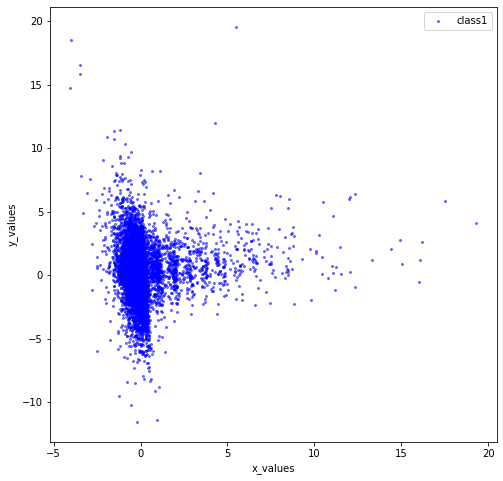

In [47]:
fig = plt.figure(figsize = (8,8))
plt.plot(tocluster[4], tocluster[1], 'o', markersize = 2, color = 'blue', alpha = 0.5, label = 'class1')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters = 4, random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)
print(centers)

[[-0.04606342 -0.15277753]
 [-0.00851737 -2.39783038]
 [-0.24978751  2.06673024]
 [ 5.57230881  1.45511416]]


In [51]:
print(c_preds[0:100])

[2 0 2 2 0 0 0 0 0 0 1 0 2 0 0 3 0 0 2 0 0 0 0 0 0 2 1 0 0 2 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 2 2 1 0 0 0 0 0 2 2 0 0 1 2 0 0 0 0 0 2 0 0 2 0 0 0]


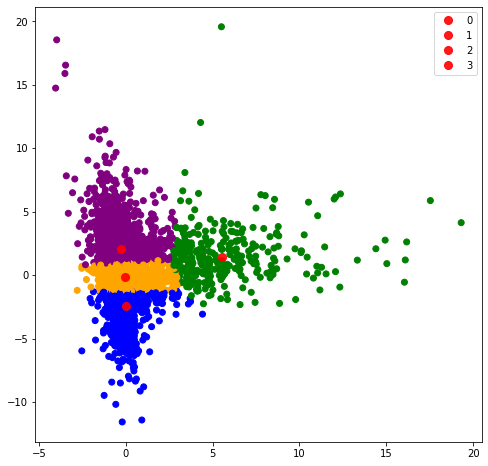

In [54]:
fig = plt.figure(figsize = (8,8))
colors = ['orange','blue','purple','green']
colored = [colors[k] for k in c_preds]

plt.scatter(tocluster[4],tocluster[1], color = colored)
for ci, c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize = 8, color = 'red', alpha = 0.9, label = '' +str(ci))
    
plt.xlabel = ('x_values')
plt.ylabel = ('y_values')
plt.legend()
plt.show()

In [55]:
clust_prod = cust_prod.copy()
clust_prod['cluster'] = c_preds

clust_prod.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
13,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,4,2
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,4,2
36,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


(25831, 135)


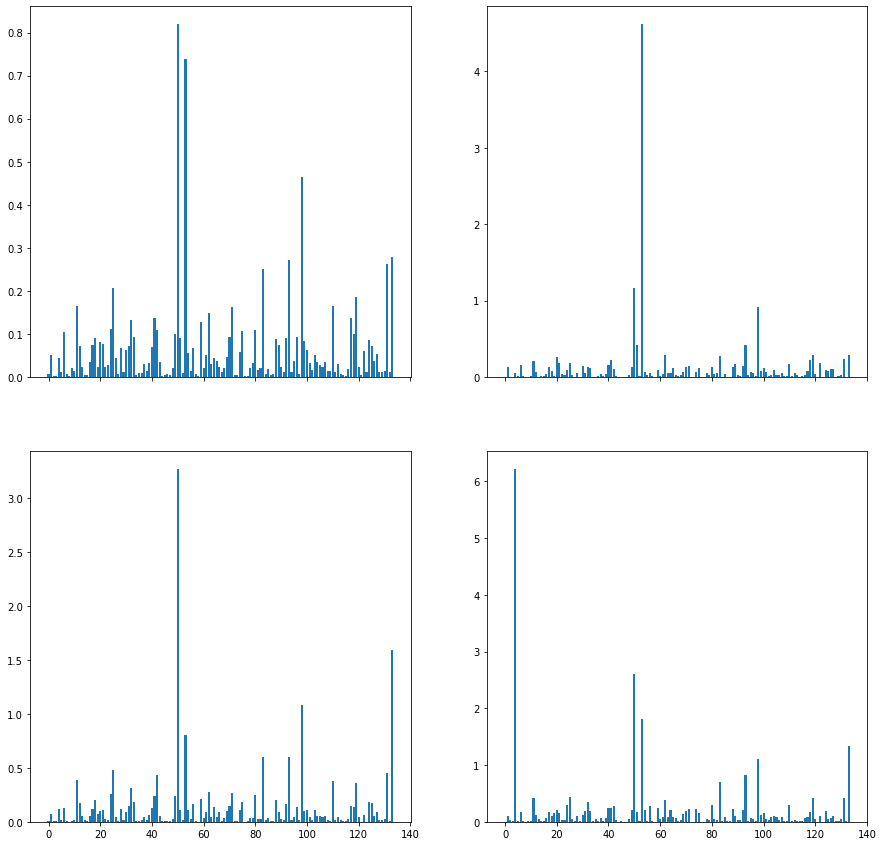

In [63]:
print(clust_prod.shape)
f,arr = plt.subplots(2,2,sharex=True,figsize=(15,15))

c1_count = len(clust_prod[clust_prod['cluster']==0])

c0 = clust_prod[clust_prod['cluster']==0].drop('cluster',axis=1).mean()
arr[0,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c0)

c1 = clust_prod[clust_prod['cluster']==1].drop('cluster',axis=1).mean()
arr[0,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c1)

c2 = clust_prod[clust_prod['cluster']==2].drop('cluster',axis=1).mean()
arr[1,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c2)

c3 = clust_prod[clust_prod['cluster']==3].drop('cluster',axis=1).mean()
arr[1,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c3)

plt.show()


In [60]:
c0.sort_values(ascending = False)[0:10]

aisle
fresh fruits                     0.819693
fresh vegetables                 0.738679
packaged vegetables fruits       0.465651
yogurt                           0.278496
packaged cheese                  0.271261
water seltzer sparkling water    0.262867
milk                             0.250221
chips pretzels                   0.205710
soy lactosefree                  0.185664
refrigerated                     0.164679
dtype: float64

In [61]:
c1.sort_values(ascending = False)[0:10]

aisle
fresh vegetables              4.620131
fresh fruits                  1.164081
packaged vegetables fruits    0.923130
packaged cheese               0.423992
fresh herbs                   0.422268
soy lactosefree               0.288866
yogurt                        0.287142
frozen produce                0.283351
milk                          0.279559
canned jarred vegetables      0.262668
dtype: float64

In [64]:
c2.sort_values(ascending = False)[0:10]

aisle
fresh fruits                     3.270591
yogurt                           1.594673
packaged vegetables fruits       1.078335
fresh vegetables                 0.801477
packaged cheese                  0.603626
milk                             0.596464
chips pretzels                   0.482319
water seltzer sparkling water    0.452775
energy granola bars              0.433751
bread                            0.384512
dtype: float64

In [65]:
c3.sort_values(ascending = False)[0:10]

aisle
baby food formula                6.223164
fresh fruits                     2.604520
fresh vegetables                 1.819209
yogurt                           1.344633
packaged vegetables fruits       1.104520
packaged cheese                  0.830508
milk                             0.697740
chips pretzels                   0.429379
soy lactosefree                  0.420904
water seltzer sparkling water    0.418079
dtype: float64

In [68]:
from IPython.display import display, HTML

cluster_means = [[c0['fresh fruits'], c0['fresh vegetables'], c0['packaged vegetables fruits'], c0['yogurt'], 
                 c0['packaged cheese'], c0['milk'], c0['water seltzer sparkling water'], c0['chips pretzels']],
                [c1['fresh fruits'], c1['fresh vegetables'], c1['packaged vegetables fruits'], c1['yogurt'], 
                 c1['packaged cheese'], c1['milk'], c1['water seltzer sparkling water'], c1['chips pretzels']],
                [c2['fresh fruits'], c2['fresh vegetables'], c2['packaged vegetables fruits'], c2['yogurt'], 
                 c2['packaged cheese'], c2['milk'], c2['water seltzer sparkling water'], c2['chips pretzels']],
                [c3['fresh fruits'], c3['fresh vegetables'], c3['packaged vegetables fruits'], c3['yogurt'], 
                 c3['packaged cheese'], c3['milk'], c3['water seltzer sparkling water'], c3['chips pretzels']]]

cluster_means = pd.DataFrame(cluster_means, columns = ['fresh fruits','fresh vegetables',
                                                       'packaged vegetables fruits','yogurt',
                                                       'packaged cheese','milk',
                                                       'water seltzer sparkling water','chips pretzels'])

HTML(cluster_means.to_html())


,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,milk,water seltzer sparkling water,chips pretzels
0,0.819693,0.738679,0.465651,0.278496,0.271261,0.250221,0.262867,0.205710
1,1.164081,4.620131,0.923130,0.287142,0.423992,0.279559,0.242330,0.189245
2,3.270591,0.801477,1.078335,1.594673,0.603626,0.596464,0.452775,0.482319
3,2.604520,1.819209,1.104520,1.344633,0.830508,0.697740,0.418079,0.429379


In [69]:
cluster_perc = cluster_means.iloc[:, :].apply(lambda x: (x / x.sum())*100, axis = 1)
HTML(cluster_perc.to_html())

,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,milk,water seltzer sparkling water,chips pretzels
0,24.895173,22.434672,14.142431,8.458287,8.238570,7.599544,7.983630,6.247694
1,14.319030,56.830902,11.355156,3.532056,5.215400,3.438772,2.980834,2.327849
2,36.829901,9.025380,12.143055,17.957507,6.797389,6.716738,5.098672,5.431358
3,28.161271,19.670128,11.942578,14.538790,8.979841,7.544288,4.520464,4.642639


In [70]:
c0.sort_values(ascending = False)[10:15]

aisle
bread             0.164182
ice cream ice     0.163353
frozen produce    0.149492
eggs              0.137177
soft drinks       0.136625
dtype: float64

In [72]:
c1.sort_values(ascending = False)[10:15]

aisle
water seltzer sparkling water    0.242330
eggs                             0.226818
soup broth bouillon              0.226474
bread                            0.213375
chips pretzels                   0.189245
dtype: float64

In [73]:
c2.sort_values(ascending = False)[10:15]

aisle
refrigerated       0.382498
soy lactosefree    0.361683
crackers           0.308863
frozen produce     0.278201
ice cream ice      0.266786
dtype: float64

In [74]:
c3.sort_values(ascending = False)[10:15]

aisle
bread             0.415254
frozen produce    0.387006
crackers          0.353107
cereal            0.302260
refrigerated      0.296610
dtype: float64